# Spatial process modeling

*Space-Time Analytics — Lecture 11*

* **Dr. Maxwell B. Joseph**  
    <i class="fa-fw fa fa-twitter"></i> [@mxwlj](https://twitter.com/mxwlj)  
    <i class="fa-fw fa fa-globe"></i> [mbjoseph.github.io](https://mbjoseph.github.io)  
    <i class="fa-fw fa fa-envelope-o"></i> [maxwell.b.joseph@colorado.edu](mailto:maxwell.b.joseph@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/mbjoseph](https://github.com/mbjoseph)

## Today

1. This week's student presentations

2. Learning stuff...  

    - Intro to Bayes' theorem
    - From simple models to Markov models 
    - From Markov models to spatial process models!  

3. Lab: [Generative model simulations](https://gist.github.com/mbjoseph/356be5ddb671ecb29e6a7528a73b0197)   


## Why Bayes?

For complex models (e.g., many spatiotemporal models), Bayesian inference is easier than other approaches. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Thomas_Bayes.gif/225px-Thomas_Bayes.gif)



## What is "Bayesian"?

All unknown quantities are treated as random variables. 

e.g., 

- model parameters
- predictions for future observations

### For today

We will get a **taste** of Bayesian reasoning, but it will be fairly **informal**

*Apologies to the mathematicians*

![](http://fruktomin.com/wp-content/uploads/2015/07/tiny-food-plate.jpg)

## Back to Bayes'ics

Definition of joint probability:

$$P(A, B) = P(A|B) P(B)$$

and also order does not matter

$$P(A, B) = P(B|A) P(A)$$

Examples:

- Event A: I eat lunch at the UMC
- Event B: I am on main campus


## Pair up: interpret the following quantities

- Event A: I eat lunch at the UMC
- Event B: I am on main campus

1. $P(A|B)$
2. $P(B)$
3. $P(B | A)$
4. $P(A)$


## Deriving Bayes' theorem

$$P(A, B) = P(A|B) P(B)$$

$$P(A, B) = P(B|A) P(A)$$

Set these equal to eachother

$$P(A|B) P(B) = P(B|A) P(A)$$

Divide both sides by $P(B)$

$$P(A | B) = \dfrac{P(B | A) P(A)}{P(B)}$$

## Bayes' thorem

$$P(A | B) = \dfrac{P(B | A) P(A)}{P(B)}$$

or, in the modern interpretation:

$$P(\theta | y) = \dfrac{P(y | \theta) P(\theta)}{P(y)}$$

where

- A: the model parameters
- B: the data

## Bayes' thorem

$$P(\theta | y) = \dfrac{P(y | \theta) P(\theta)}{P(y)}$$

1. $P(\theta | y)$: the *posterior* distribution

What we know about the parameters after observing y

2. $P(\theta)$: the *prior* distribution

What we knew about the parameters before observing y

3. $P(y | \theta)$: the *likelihood*

The probability of the data given the parameters (i.e., how do our observations $y$ relate to our model $\theta$?)


## Pair up: applying Bayes' theorem

Patient X just tested positive for moosebumps. 
Only 1 in 10000 people have moosebumps in this country. 
The test comes up as positive 98% of the time when patients are infected, and comes up positive 5% of the time when patients are not infected. 


What is the probability that Patient X has moosebumps?



## Moosebumps hints

Definitions: 

- $D$: the event that the person has moosebumps
- $D_c$: the event that the person does not have moosebumps
- $Y$: the event that a test is positive

From the problem statement: 

- $P(D) = 0.0001$
- $P(D_c) = 1 - P(D) = 0.9999$
- $P(Y | D) = 0.98$
- $P(Y|D_c) = 0.05$

**Goal:** find $P(D | Y)$ using Bayes' theorem


## Substituting known values

$$P(D | Y) = \dfrac{P(Y | D) P(D)}{P(Y)}$$

$$P(D | Y) = \dfrac{0.98 \times 0.0001}{P(Y)}$$

But what's $P(Y)$?

## Finding $P(Y)$

$P(Y):$ the probability that a test is positive

This can occur in two ways: 

1. The person is infected $P(Y | D)$, which arises with probability $P(D)$
2. The person is not infected $P(Y | D_c)$, which arises with probability $P(D_c)$

To find $P(Y)$, marginalize over $D$!

$P(Y) = $ P(infected and the test is positive) + P(infected and test is negative)

## Marginalizing over all possibilities


$P(Y) = $ P(infected and the test is positive) + P(infected and test is negative)

$$P(Y) = \sum_{D, D_c} P(Y, D)$$

$$= P(Y, D) + P(Y, D_c)$$

$$= P(Y | D) P(D) + P(Y|D_c) P(D_c)$$

$$= 0.98 \times 0.0001 + 0.05 \times 0.9999$$

$$= 0.050093$$

## Putting it all together


$$P(D | Y) = \dfrac{P(Y | D) P(D)}{P(Y)}$$

Substituting the known values

$$P(D | Y) = \dfrac{0.98 \times 0.0001}{0.050093}$$

$$P(D | Y) = 0.001956361$$

or, about a 0.2% chance that the patient has moosebumps


## Bayes' theorem updates prior beliefs with data

#### Before having been tested

We would expect that the patient has the same chance as everyone else of having moosebumps, $P(D) = 0.0001$.

#### After seeing the test result $Y$

We have updated our belief about whether the patient has moosebumps, $P(D | Y) \approx 0.002$

## High level perspective

Bayes' theorem: 

- provides a formal procedure for updating knowledge about unknown quantities from data

**In practice**

Spatiotemporal models are often Bayesian

- all you have to do is frame the problem in terms of Bayes' theorem, and the rest is *relatively* easy


## Where do we go from here?

Today I can take you to the first castle, but to rescue the princess you'll need more than one class in Bayesian inference.

![](http://www.tft.ucla.edu/mediascape/images/Fall%202013/Gish-image1.jpg)


## Think in terms of generative models

We will not worry about model fitting/parameter estimation

Instead the **generative model** perspective relates to:

- how would the model **generate** observations?
- what do our prior distributions imply about our expectations for the data?

## Simple Bayesian models

**Model of the mean**

*Specification*

We have observations $y_1, y_2, ..., y_{N_t}$, each of which is independent and identically distributed as:

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

Equivalently:

$$y_t = \epsilon_t$$

$$\epsilon_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

## Wait, what is that squiggly thing ($\sim$)?


$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

Translation: 

$y_t$ *is distributed as* a Normal random variable with mean zero and standard deviation $\sigma_y$

Implication:

$y_t$ is a **random variable**

e.g., to generate normally distributed random numbers: 

- in R: `rnorm(n, mean = 0, sd = 1)`
- in Python: `numpy.random.normal(loc=0.0, scale=1.0, size=None)`

## Model of the mean

*Specification*

We have observations $y_1, y_2, y_{N_t}$, each of which is independent and identically distributed as:

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

### Pair up

1. List the model parameters ($\theta$)
2. List the data ($y$)
3. Write out the posterior distribution for the parameters $p(\theta | y)$ up to the proportionality constant $p(y)$

## Model of the mean


*Specification*

We have observations $y_1, y_2, y_{N_t}$, each of which is independent and identically distributed as:

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

Posterior distribution: 

$$p(\sigma_y | y) \propto p(y | \sigma_y) p(\sigma_y)$$

## Choosing a prior for $\sigma_y$

Posterior distribution: 

$$p(\sigma_y | y) \propto p(y | \sigma_y) p(\sigma_y)$$

We need to choose a prior that ensures $\sigma_y$ is positive 

e.g., 

- $\sigma_y \sim \text{Normal}_+(0, 1)$
- $\sigma_y \sim \text{Uniform}(0, \inf)$
- ...

## Choosing a prior for $\sigma_y$

Posterior distribution: 

$$p(\sigma_y | y) \propto p(y | \sigma_y) p(\sigma_y)$$

We need to choose a prior that ensures $\sigma_y$ is positive 

e.g., 

- $\sigma_y \sim \text{Normal}_+(0, 1)$ $\leftarrow$ Let's use this one for today
- $\sigma_y \sim \text{Uniform}(0, \inf)$
- ...

## Quick note on the half-Normal distribution

You all know the Normal or Gaussian distribution


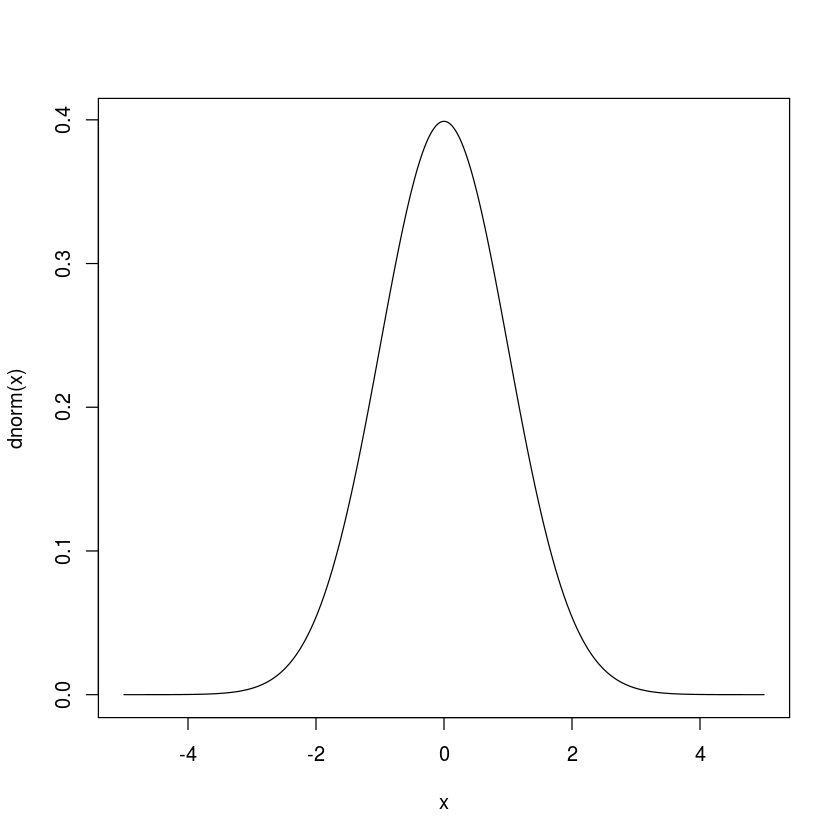

In [1]:
x <- seq(-5, 5, .01)
plot(x, dnorm(x), type = "l")

## The half-Normal is the Normal distribution, folded over itself at $x=0$



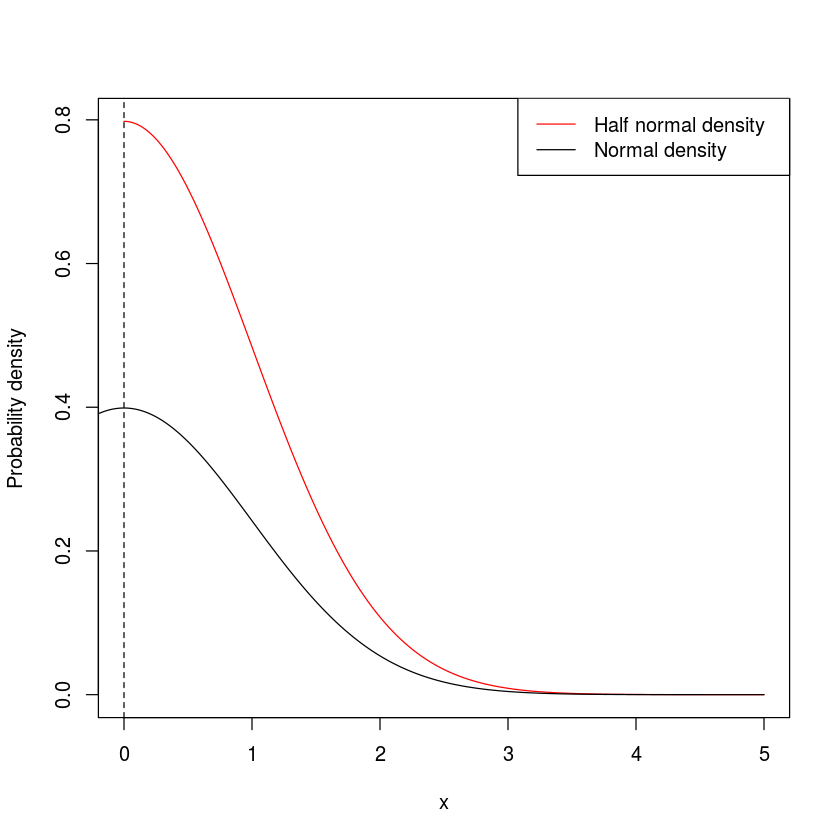

In [2]:
# plot half-normal with normal
x <- seq(-5, 5, .01)
xhalf <- seq(0, 5, .01)
plot(xhalf, 2*dnorm(xhalf), type = "l", col = "red", 
     xlab = "x", ylab = "Probability density")
lines(x, dnorm(x), type = "l")
abline(v = 0, lty = 2)
legend("topright", lty = 1, col = c("red", "black"), 
      legend = c("Half normal density", "Normal density"))

## Model of the mean

*Specification*

We have observations $y_1, y_2, y_{N_t}$, each of which is independent and identically distributed as:

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

### Pair up; draw a directed acyclic graph (DAG) for the model

The DAG has arrows from parameter A to the other parameter(s) or data that stochastically depend on parameter A

## Model of the mean: DAG

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$y$ depends on $\sigma_y$:

$\sigma_y \rightarrow y$

## Model of the mean

*Specification*

We have observations $y_1, y_2, y_{N_t}$, each of which is independent and identically distributed as:

$$y_t \sim \text{Normal}(\mu = 0, \sigma_y)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

### Simulate one realization from this model and plot it

The lab is here: https://gist.github.com/mbjoseph/356be5ddb671ecb29e6a7528a73b0197

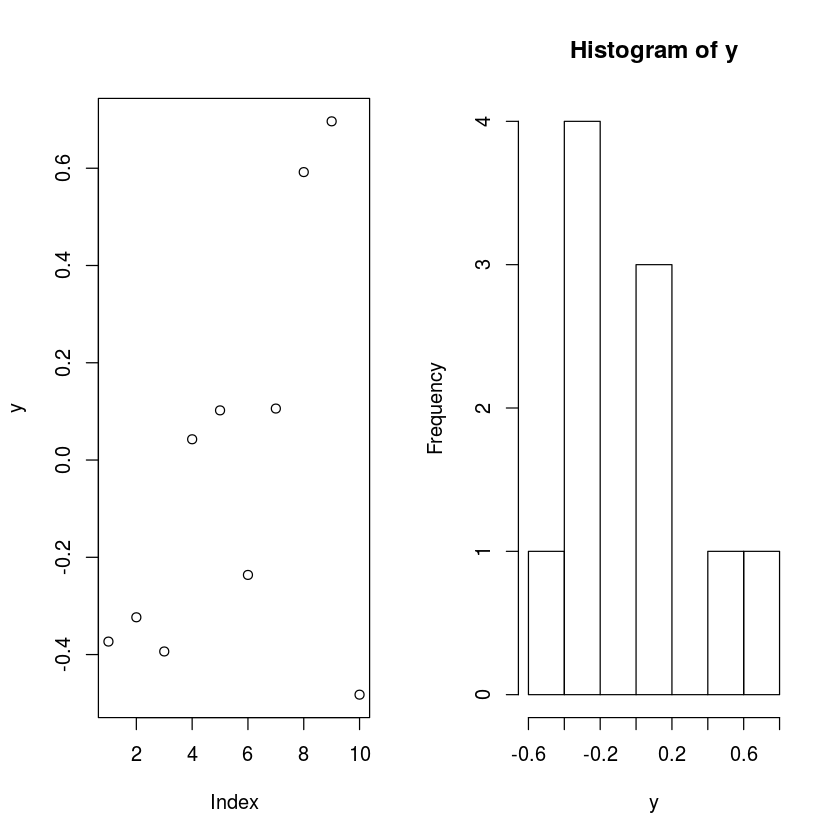

In [3]:
# Set up high level quantities
N_t <- 10

# Draw from prior distribution
sigma_y <- abs(rnorm(1, mean = 0, sd = 1))

# Draw observations 
y <- rnorm(N_t, mean = 0, sd = sigma_y)

# Visualize
par(mfrow = c(1, 2))
plot(y)
hist(y)

## Recap

What did we just do? 

1. Specified a model in terms of two components: 

    - likelihood: what is the distribution of data, given the parameters
    - prior: what is the distribution of parameters

## Recap

What did we just do? 

1. Specified a model in terms of two components: 

    - likelihood: what is the distribution of data, given the parameters
    - prior: what is the distribution of parameters

2. Simulated a realization from the model

    - techinically this is a *prior predictive simulation*
    - what the data might look like, given our priors

## Why bother simulating from your model?

Aren't we more interested in model *fitting*? 

## Why bother simulating from your model?

Aren't we more interested in model *fitting*? 

1. Never trust, and do verify your estimates 

![](http://img.wennermedia.com/article-leads-horizontal/donald-trump-melania-vote-zoom-50338a60-b5f0-486a-970b-8a253f625087.jpg)

## Why bother simulating from your model?

Aren't we more interested in model *fitting*? 

1. Never trust, and do verify your estimates 

2. Simulation provides a way to investigate your model's behavior

![](https://upload.wikimedia.org/wikipedia/commons/0/0f/Benedict_Cumberbatch_filming_Sherlock_cropped2.jpg)

## Why bother simulating from your model?

Aren't we more interested in model *fitting*? 

1. Never trust, and do verify your estimates 

2. Simulation provides a way to investigate your model's behavior

3. Explore implications of your priors (**are they reasonable?**)


## Moving on: allow the mean to vary among timesteps

*Specification*

At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t \sim \text{Normal}(0, \sigma_\beta)$$

$$\sigma_\beta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

## WTH is happening?

The mean is **time-varying**. 

aka:

- "random effects" model
- "random intercept" model
- "varying intercept" model

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t \sim \text{Normal}(0, \sigma_\beta)$$

$$\sigma_\beta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$



## Let's draw the DAG together

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t \sim \text{Normal}(0, \sigma_\beta)$$

$$\sigma_\beta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

## Simulate one realization from this model

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t \sim \text{Normal}(0, \sigma_\beta)$$

$$\sigma_\beta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t \sim \text{Normal}(0, \sigma_\beta)$$

$$\sigma_\beta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

In [4]:
N_s <- 100 # number of sites
N_t <- 10 # number of time steps

# draw priors
sigma_y <- abs(rnorm(n = 1, mean = 0, sd = 1))
sigma_beta <- abs(rnorm(n = 1, mean = 0, sd = 1))
beta <- rnorm(n = N_t, mean = 0, sd = 1)

# draw observations from the likelihood
y <- matrix(nrow = N_s, ncol = N_t)
for (t in 1:N_t) {
    y[, t] <- rnorm(N_s, mean = beta[t], sd = sigma_y)
}

## Visualizing our realization


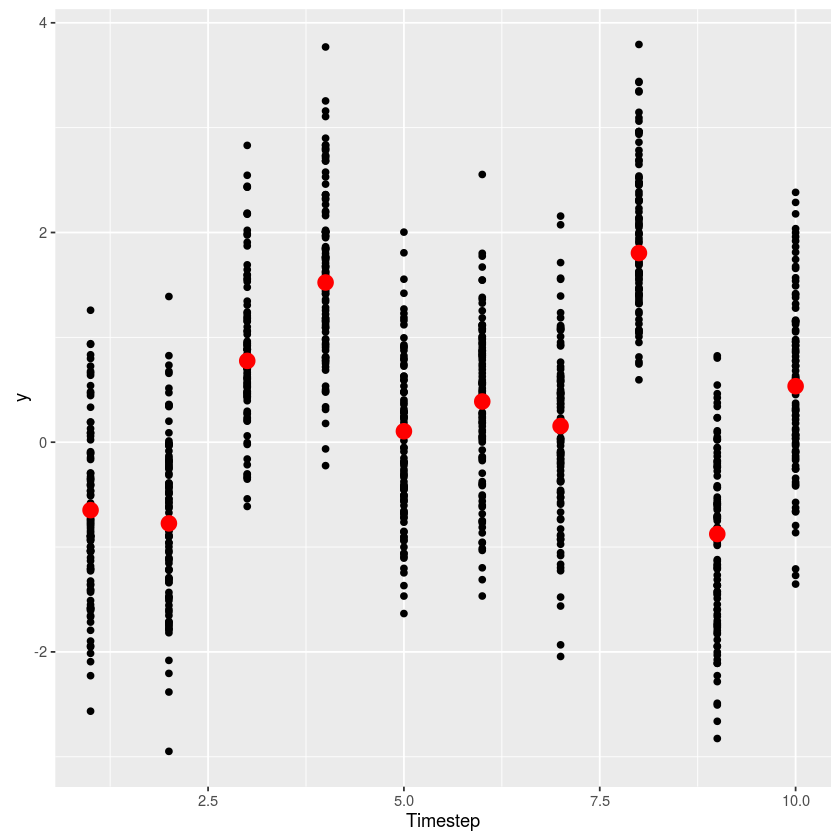

In [5]:
library(reshape2)
library(ggplot2)

y_df <- melt(y, varnames = c("Site", "Timestep"))

ggplot(y_df, aes(x = Timestep, y = value)) + 
    geom_point() + 
    ylab("y") + 
    geom_point(data = data.frame(Timestep = 1:N_t, value = beta), 
               col = "red", size = 4)

## Adding Markov time dependence

What's Markovian?

The mean at time $t$ depends on the mean at time $t-1$:

$$\mu_t = f(\mu_{t - 1})$$

![](https://upload.wikimedia.org/wikipedia/commons/a/a8/Andrei_Markov.jpg)


## Adding Markov time dependence

TLDR: the mean at time $t$ depends on the mean at time $t-1$

*Specification*

At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

## Let's draw the DAG together

*Specification*

At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

## Simulate one realization from this model


At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

In [6]:
# initialize empty objects
y <- matrix(nrow = N_s, ncol = N_t)
beta <- rep(NA, N_t)

# draw from priors
sigma_eta <- abs(rnorm(n = 1, mean = 0, sd = 1))
eta <- rnorm(n = N_t, mean = 0, sd = sigma_eta)

beta_0 <- rnorm(n = 1, mean = 0, sd = 1)
for (t in 1:N_t) {
    if (t == 1) {
        beta[t] <- beta_0 + eta[t]
    } else {
        beta[t] <- beta[t - 1] + eta[t]
    }
}

# simulate observations
for (i in 1:N_s) {
    for (t in 1:N_t) {
        y[i, t] <- rnorm(n = 1, mean = beta[t], sd = sigma_y)
    }
}

## Visualizing our simulation


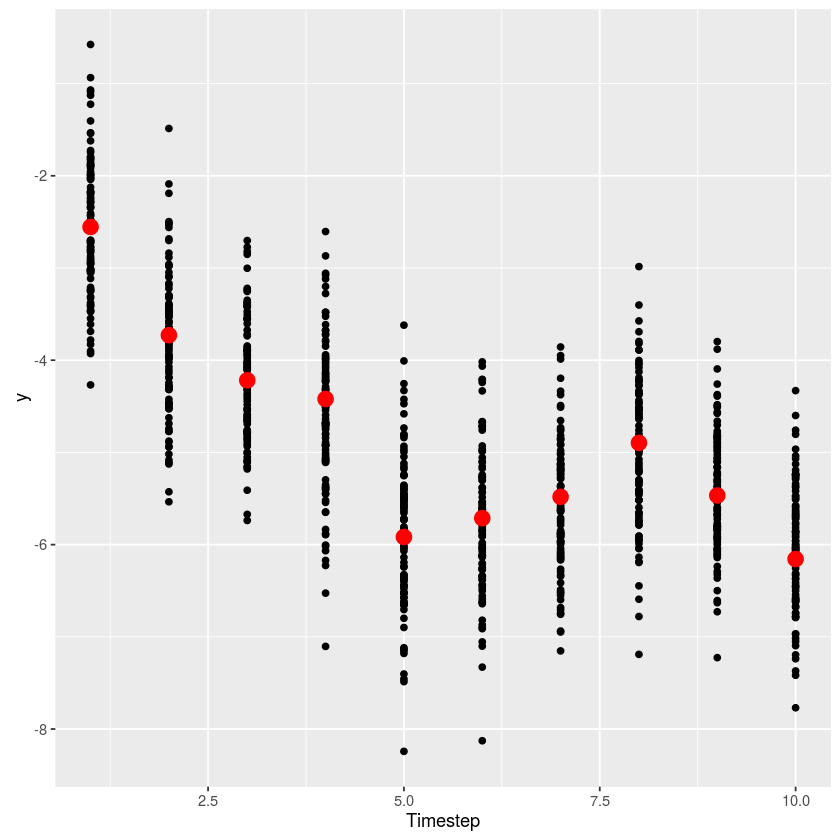

In [7]:
y_df <- melt(y, varnames = c("Site", "Timestep"))

ggplot(y_df, aes(x = Timestep, y = value)) + 
    geom_point() + 
    ylab("y") + 
    geom_point(data = data.frame(Timestep = 1:N_t, value = beta), 
               col = "red", size = 4)

## Checkpoint: what have we done

1. Started with a simple "model of the mean" 

2. Allowed the mean to vary among timesteps

3. Allowed the mean to vary among timesteps with Markov dependence

At each step, we

- specified a model
- drew the DAG
- simulated realization(s)

### What else do we need to add to have a spatio-temporal model? 

## Incorporating spatial dependence

First, a quick note on spatially continuous Gaussian processes

![](http://homepages.inf.ed.ac.uk/amos/figures/gpprior.png)

## What is a Gaussian process?

A prior distribution for a function!

*Most spatially continuous models use Gaussian processes*

In geography, you've probably heard of **kriging**, which is a special type of Gaussian process



## Univariate Gaussian processes

If we have locations $x_1, x_2, ..., x_N$, and we place a Gaussian process prior on $y$, which is a function of $x$: 

$$y \sim \text{GP}(\mu(x), K(x))$$

**Note**

A Gaussian process has two parameters: 

1. A mean function $\mu(x)$
2. A covariance function $K(x)$

And these are used as parameters for a multivariate distribution

$$y \sim \text{GP}(\mu(x), K(x)) \rightarrow y \sim \text{Multivariate normal}(\mu, K)$$ 

## Univariate Gaussian processes

Locations $x_1, x_2, ..., x_N$, and we place a Gaussian process prior on $y$, which is a function of $x$: 

$$y \sim \text{GP}(\mu(x), K(x))$$

$$\mu(x) = 0$$

$$K(x) = \gamma^2 \text{exp}(-\phi D) + \sigma^2 I_N$$

The *Exponential* covariance function:

- $\gamma^2$: the process variance
- $\phi$: a (possibly spatial) decay parameter
- $\sigma^2$: the "nugget", or unexplained variance


## Simulating a univariate Gaussian processes

Locations $x_1, x_2, ..., x_N$, and we place a Gaussian process prior on $y$, which is a function of $x$: 

$$y \sim \text{GP}(\mu(x), K(x))$$

$$\mu(x) = 0$$

$$K(x) = \gamma^2 \text{exp}(-\phi D) + \sigma^2 I_N$$

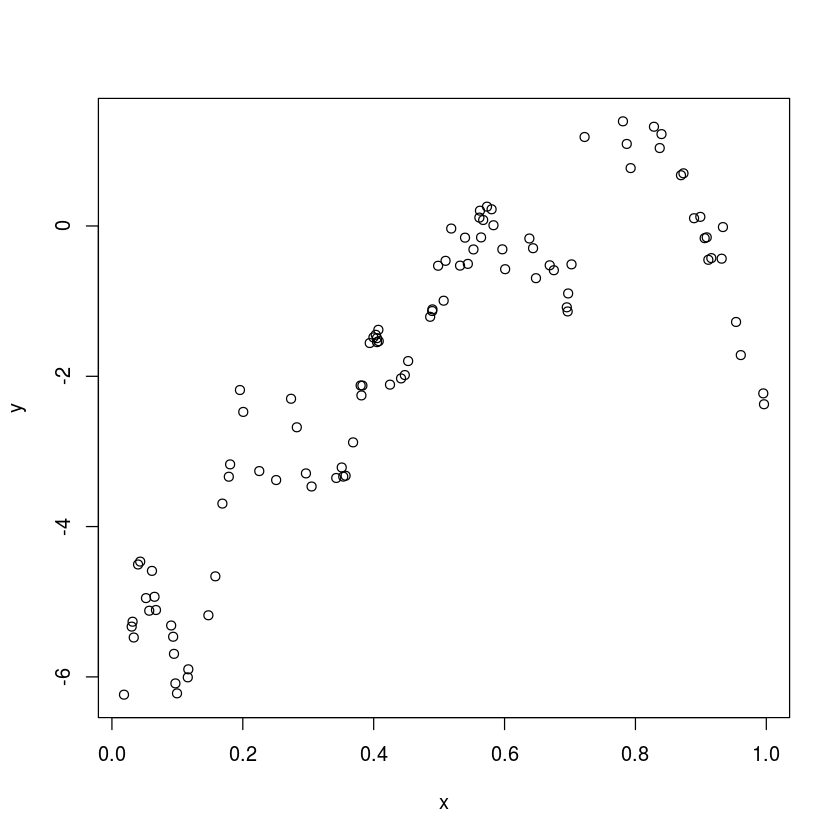

In [8]:
library(MASS) # for mvrnorm

# Set up data
N <- 100
x <- sort(runif(N))
D <- as.matrix(dist(x))

# Choose parameters
gamma_sq <- 10
phi <- 1
sigma_sq <- .01

K <- gamma_sq * exp(-phi * D) + sigma_sq * diag(N)

# Simulate observations
y <- mvrnorm(n = 1, mu = rep(0, N), Sigma = K)

plot(x, y)

## Simulating a univariate Gaussian processes with a 2-d input

Locations $s = 1, 2, ..., N_s$, and we place a Gaussian process prior on $y$, which is a function of $s$: 

$$y \sim \text{GP}(\mu(x), K(x))$$

$$\mu(x) = 0$$

$$K(x) = \gamma^2 \text{exp}(-\phi D) + \sigma^2 I_N$$

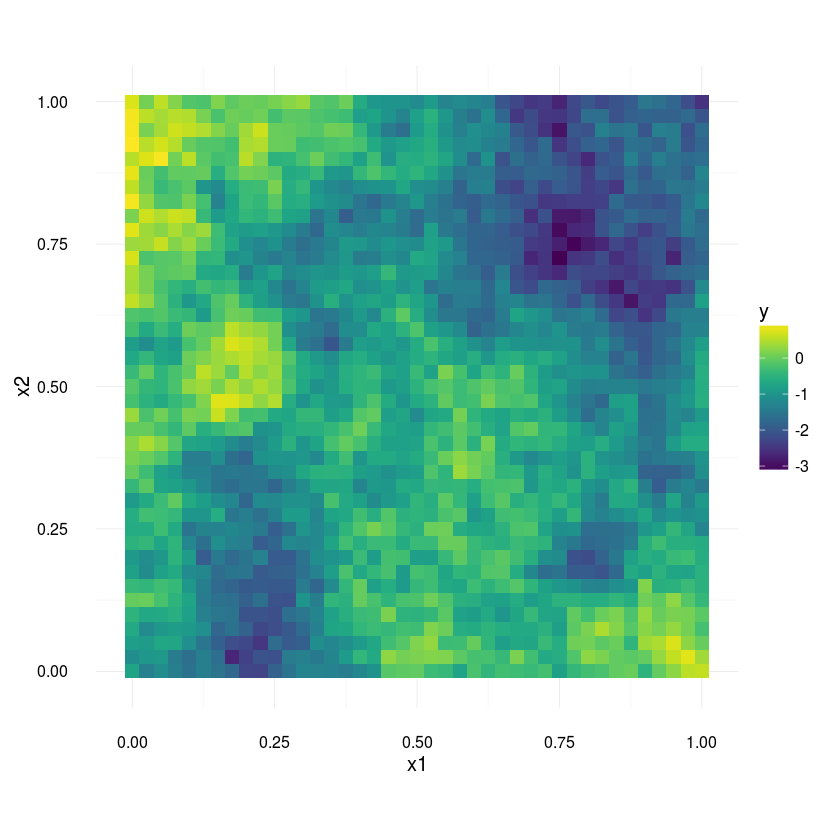

In [9]:
library(viridis) # for color palette

# Set up data
coords <- expand.grid(x1 = seq(0, 1, .025), 
                      x2 = seq(0, 1, .025))
N_s <- nrow(coords)
D <- as.matrix(dist(coords))


# Simulate parameters & observations
gamma_sq <- 10
phi <- .2
sigma_sq <- .01
K <- gamma_sq * exp(-phi * D) + sigma_sq * diag(N_s)
y <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)


# Visualize
coords$y <- y
ggplot(coords, aes(x = x1, y = x2, fill = y)) + 
    geom_tile() + 
    scale_fill_viridis() + 
    theme_minimal() + 
    coord_equal()

## Where were we?

At $N_s = 100$ spatial locations we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\beta_t, \sigma_y)$$

**Priors**

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

### Let's start adding spatial dependence...

## A specification with spatial + temporal dependence

At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

**Priors**

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

## Draw the DAG


At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

**Priors**

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

## Woah. This is getting complicated!

Pair up and make sure you and your partner can identify which parameter(s):

1. Control the amount of unexplained variation in $y$?
2. Is the nugget effect?
3. Controls the magnitude of among-timestep differences?
4. Determines the smoothness of the spatial effect?
5. Determines the amount of spatial process variation?


**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

**Priors**

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

## Simulate a realization from this model

At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

**Priors**

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$


In [10]:
# set up data
N_s <- 100
N_t <- 10
x <- matrix(runif(N_s * 2), ncol = 2)
D <- as.matrix(dist(x))
y <- matrix(nrow = N_s, ncol = N_t)

# draw parameters
omega <- abs(rnorm(1))
phi <- abs(rnorm(1))
gamma <- abs(rnorm(1))
sigma_y <- abs(rnorm(1))
sigma_eta <- abs(rnorm(1))
beta_0 <- rnorm(1)

# temporal effects
beta <- rep(NA, N_t)
eta <- rnorm(n = N_t, mean = 0, sd = sigma_eta)
beta[1] <- beta_0 + eta[1]
for (t in 2:N_t) {
    beta[t] <- beta[t - 1] + eta[t]
}

# spatial effects
K <- gamma**2 * exp(-phi * D)
alpha <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)

# observations
for (i in 1:N_s) {
    for (t in 1:N_t) {
        y[i, t] <- rnorm(1, mean = alpha[i] + beta[t], sigma_y)
    }
}

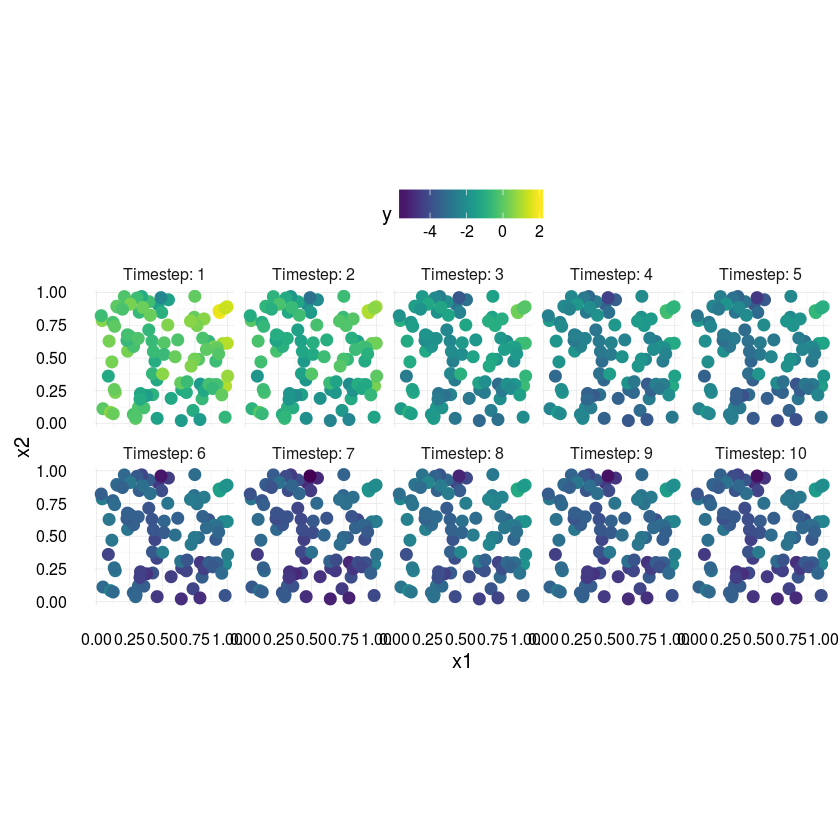

In [11]:
# make a data frame for y and add the spatial coordinates
y_df <- melt(y, varnames = c("Site", "Timestep"), value.name = "y")
y_df$x1 <- x[y_df$Site, 1]
y_df$x2 <- x[y_df$Site, 2]

ggplot(y_df, aes(x = x1, y = x2, color = y)) + 
    geom_point(size = 3) + 
    facet_wrap(~ Timestep, nrow = 2, labeller = "label_both") + 
    scale_color_viridis() + 
    theme_minimal() + 
    coord_equal() + 
    theme(legend.position = "top")

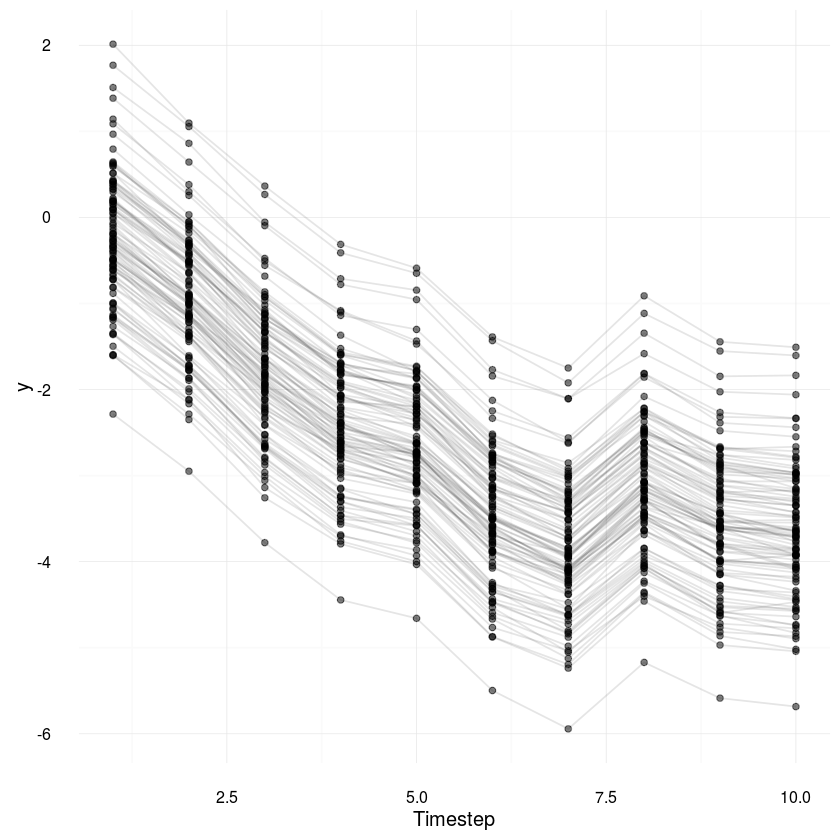

In [12]:
ggplot(y_df, aes(x = Timestep, y = y, group = Site)) + 
    geom_line(alpha = .1) + 
    geom_point(alpha = .5) + 
    theme_minimal()

## Our current model

At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_s + \beta_t, \sigma_y)$$

**Priors**

$$\alpha_s \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

### Next: add a spatio-temporal effect

## How to make a spatio-temporal effect

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$

What was a purely spatial effect ($\alpha_s$) is now allowed to vary in space *and* time ($\alpha_{st}$).


## How to make a spatio-temporal effect

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$


Let $\alpha_{st}$ have:

- Markov dependence in time
- spatial correlation in among-timestep differences

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

## How to make a spatio-temporal effect

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$


Let $\alpha_{st}$ have:

- Markov dependence in time
- spatial correlation in among-timestep differences

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

**Question**

How might we induce spatial correlation in among-timestep differences? 



## Our spatiotemporal model

**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$

**Priors**

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

$$\omega_{s, t} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\alpha_{s, t = 0} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

## Let's draw the DAG


**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$

**Priors**

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

$$\omega_{s, t} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\alpha_{s, t = 0} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

## Simulate one realization from the spatiotemporal process model

At $N_s = 100$ spatial locations with locations $x_1, x_2, ..., x_{N_s}$ we observe the response $y(s, t)$ at each of $N_t = 10$ time steps:


**Likelihood**

$$y(s, t) \sim \text{Normal}(\alpha_{st}+ \beta_{t}, \sigma_y)$$

**Priors**

$$\alpha_{st} = \alpha_{s, t - 1} + \omega_{st}$$

$$\omega_{s, t} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\alpha_{s, t = 0} \sim \text{GP}(0, [\gamma^2 \text{exp}(-\phi d_{ij})])$$

$$\beta_t = \beta_{t - 1} + \eta_t$$

$$\eta_t \sim \text{Normal}(0, \sigma_\eta)$$

$$\beta_{t = 0} \sim \text{Normal}(0, 1)$$

$$\sigma_\eta \sim \text{Normal}_+(0, 1)$$

$$\sigma_y \sim \text{Normal}_+(0, 1)$$

$$\gamma \sim \text{Normal}_+(0, 1)$$

$$\phi \sim \text{Normal}_+(0, 1)$$

In [13]:
# set up data
N_s <- 100
N_t <- 10
x <- matrix(runif(N_s * 2), ncol = 2)
D <- as.matrix(dist(x))
y <- matrix(nrow = N_s, ncol = N_t)

# draw parameters
phi <- abs(rnorm(1))
gamma <- abs(rnorm(1))
sigma_y <- abs(rnorm(1))

sigma_eta <- abs(rnorm(1))
eta <- rnorm(N_t, 0, sigma_eta)

# temporal effects
beta_0 <- rnorm(1)
beta <- rep(NA, N_t)
beta[1] <- beta_0 + eta[1]
for (t in 2:N_t) {
    beta[t] <- beta[t - 1] + eta[t]
}

# spatiotemporal effects
K <- gamma**2 * exp(-phi * D)
alpha_0 <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)
omega <- matrix(nrow = N_s, ncol = N_t)
alpha <- matrix(nrow = N_s, ncol = N_t)
for (t in 1:N_t) {
    omega[, t] <- mvrnorm(n = 1, mu = rep(0, N_s), Sigma = K)
    if (t == 1) {
        alpha[, t] <- alpha_0 + omega[, 1]
    } else {
        alpha[, t] <- alpha[, t - 1] + omega[, t]
    }
}

# observations
for (i in 1:N_s) {
    for (t in 1:N_t) {
        y[i, t] <- rnorm(1, mean = alpha[i, t] + beta[t], sd = sigma_y)
    }
}


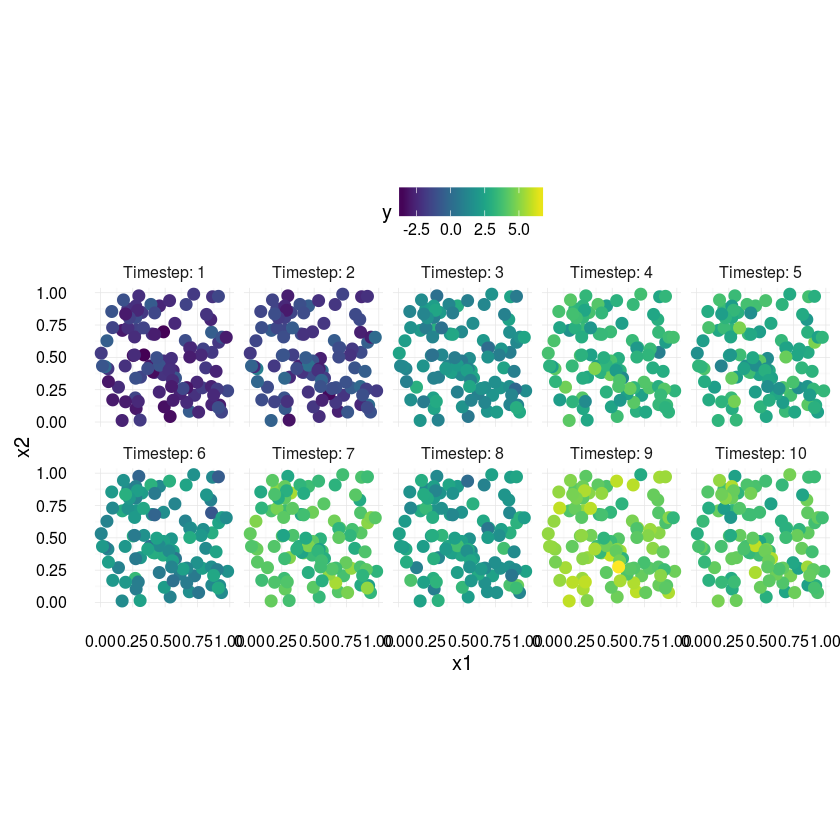

In [14]:
# make a data frame for y and add the spatial coordinates
y_df <- melt(y, varnames = c("Site", "Timestep"), value.name = "y")
y_df$x1 <- x[y_df$Site, 1]
y_df$x2 <- x[y_df$Site, 2]

ggplot(y_df, aes(x = x1, y = x2, color = y)) + 
    geom_point(size = 3) + 
    facet_wrap(~ Timestep, nrow = 2, labeller = "label_both") + 
    scale_color_viridis() + 
    theme_minimal() + 
    coord_equal() + 
    theme(legend.position = "top")

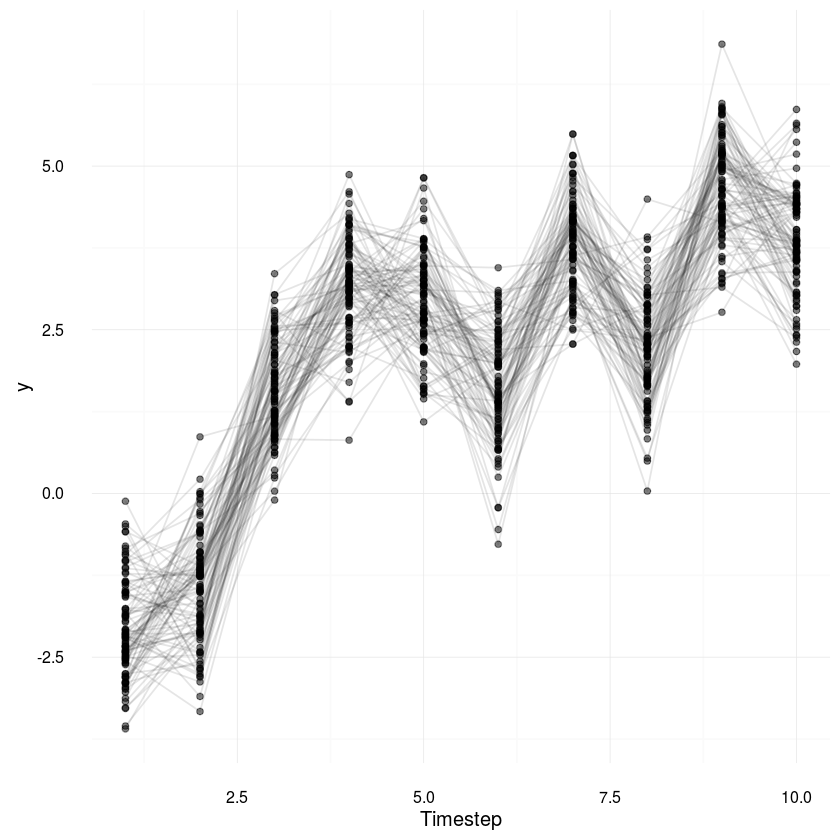

In [15]:
ggplot(y_df, aes(x = Timestep, y = y, group = Site)) + 
    geom_line(alpha = .1) + 
    geom_point(alpha = .5) + 
    theme_minimal()

## Closing thoughts

1. Try to answer the questions at the end of your lab!

2. This spatiotemporal process model is quite general, but not very mechanistic!

3. Make use of simulations to make sure that you understand your models!

![That's all folks](http://media3.giphy.com/media/jYAGkoghdmD9S/giphy.gif)